# **Environment Set-Up**

Before anything, we need to import some Python packages to help with data inspection and visualization: 

- **pandas** - Open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **matplotlib** - Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

- **math** -  It provides access to the mathematical functions defined by the C standard.

# **Data Analysis**

Let's import the aforementioned packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, pow

It's always a good idea to preview our test data. Let's import it and give it a peak.

In [2]:
test_data = pd.read_csv("test_data.csv")

test_data.head(10)

,time,x_acc,y_acc,z_acc
0,0.2,0.238,0.134,0.964
1,0.4,0.309,0.059,0.990
2,0.6,0.270,-0.226,1.008
3,0.8,0.479,-0.461,0.889
4,1.0,0.377,-0.204,0.181
5,1.2,0.455,0.010,0.753
6,1.4,0.347,-0.177,1.467
7,1.6,0.184,0.054,1.023
8,1.8,-0.010,-0.049,1.028
9,2.0,0.005,0.088,1.079


Cool - we have data from a triaxial accelerometer with a running time. 

What is great is this data is representative of an IMU - it is actual data collected from the MetaMotionR IMU, a high end 9-axis IMU similar in principle to the Teensy 3.2: 

<img src="metamotion.png"/>

<img src="metamotion_hardware.png"/>

<img src="metamotion_specs.png"/>

## **Data Visualization**

Let's go ahead and visualize accelerometry on each axis using matplotlib. 

First, let's split up our data into the respective acclerations

In [3]:
x_acc = test_data.x_acc
y_acc = test_data.y_acc
z_acc = test_data.z_acc
time = test_data.time

Now, let's plot the accelerations! 

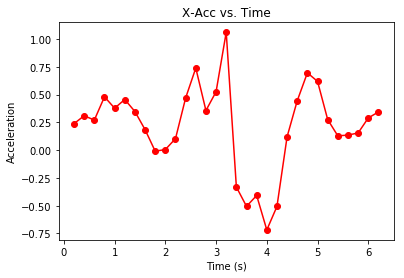

In [4]:
plt.subplot(1, 1, 1)
plt.gca().set_title("X-Acc vs. Time")
plt.plot(time, x_acc, "ro-")
plt.ylabel("Acceleration")
plt.xlabel("Time (s)")
plt.show()

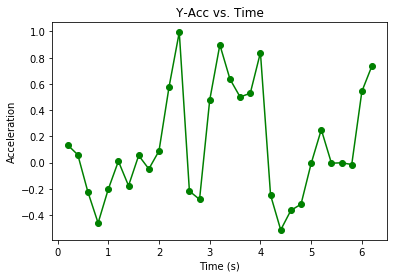

In [5]:
plt.subplot(1, 1, 1)
plt.gca().set_title("Y-Acc vs. Time")
plt.plot(time, y_acc, "go-")
plt.ylabel("Acceleration")
plt.xlabel("Time (s)")
plt.show()

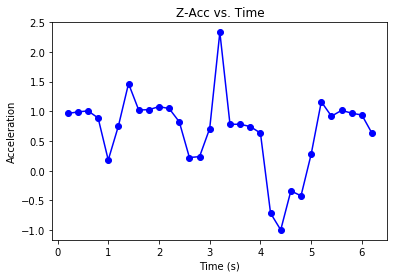

In [6]:
plt.subplot(1, 1, 1)
plt.gca().set_title("Z-Acc vs. Time")
plt.plot(time, z_acc, "bo-")
plt.ylabel("Acceleration")
plt.xlabel("Time (s)")
plt.show()

## **Data Inspection**

Now that we have plotted each axis, let's compare each axis in this time frame to see what is happening.

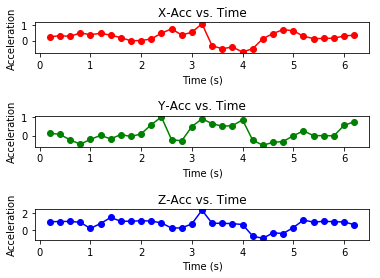

In [7]:
plt.subplot(3, 1, 1)
plt.gca().set_title("X-Acc vs. Time")
plt.plot(time, x_acc, "ro-")
plt.ylabel("Acceleration")
plt.xlabel("Time (s)")

plt.subplot(3, 1, 2)
plt.gca().set_title("Y-Acc vs. Time")
plt.plot(time, y_acc, "go-")
plt.ylabel("Acceleration")
plt.xlabel("Time (s)")

plt.subplot(3, 1, 3)
plt.gca().set_title("Z-Acc vs. Time")
plt.plot(time, z_acc, "bo-")
plt.ylabel("Acceleration")
plt.xlabel("Time (s)")

plt.subplots_adjust(hspace=2)
plt.show()

It seems like there is some event happening around the three second mark. Let's get a better look by overlaying each plot on each other:

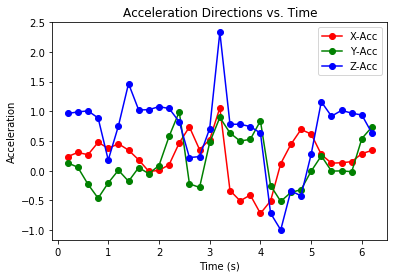

In [11]:
fig, ax = plt.subplots()
ax.plot(time, x_acc, "ro-", label="X-Acc")
ax.plot(time, y_acc, "go-", label="Y-Acc")
ax.plot(time, z_acc, "bo-", label="Z-Acc")
ax.set(xlabel="Time (s)", ylabel = "Acceleration", title = "Acceleration Directions vs. Time")
ax.legend()

plt.show()

It's a little noisy, but there appears to be significant movement happening at the 3 second mark - this is actually me standing up from my chair. There is another point of interest at the 4 second mark where almost all the signals go negative. This is where I fell down on the ground. At the 2, 3, and 4 second marks, there are some spikes along the y-axis acceleration - I do not know for sure, but I hypothesize these are me taking steps. More processing will have to be done to confirm this hypothesis. 

Without any real signal processing, we can roughly tell when a fall occurs and we can expect to see a dramatic deceleration in the y-axis and z-axis. 

# **Processing Methods**

The following methods demonstrated below show possible methods for analyzing accelerometry data. Each method is interactive and includes a basic pros and cons analysis.

## **Method 1: Magnitude Method** 

### **Summary**

This method is courtesy of Ayse Cakmak, a PhD Student at Georgia Tech's Department of Electrical Engineering. It is a rather simple method that looks at the magnitude of accelerations across all dimensions and can help determine points of interest. 

The key function to determine the **magnitude of acceleration** is:

$A_{mag}(t) = \sqrt{A(t)_x^2 + A(t)_y^2 + A(t)_z^2}$

### **Implementation** 

Let's implement this method to calculate the magnitude of accelerations. Let's start with reviewing our data and slicing up our data frame to prep for plotting:

In [12]:
mag_data = test_data.copy()

mag_x_acc = mag_data.x_acc
mag_y_acc = mag_data.y_acc
mag_z_acc = mag_data.z_acc
mag_time = mag_data.time

mag_data.head(5)

,time,x_acc,y_acc,z_acc
0,0.2,0.238,0.134,0.964
1,0.4,0.309,0.059,0.990
2,0.6,0.270,-0.226,1.008
3,0.8,0.479,-0.461,0.889
4,1.0,0.377,-0.204,0.181


Now let's explicitly implement this method:

In [13]:
for i in range(len(mag_x_acc)):
    print(sqrt( pow(mag_x_acc[i], 2) + pow(mag_y_acc[i], 2) + pow(mag_z_acc[i], 2) ))

1.0019461063350663
1.0387790910487176
1.0677265567550525
1.1100824293718012
0.46530205243475986
0.8798488506556111
1.5178362889323735
1.0408174671862496
1.029215720828243
1.0825941067639338
1.202211711804539
1.3736713580765962
0.8011847477330057
0.5121923466823768
1.003853574979937
2.7135889519232643
1.0612464369787067
1.0578870450100049
0.9999204968396238
1.2738406493749523
0.9104097978383142
1.1263307684690143
0.666787072460167
0.8725766441980899
0.6776850300840355
1.2201926077468261
0.9268942766033244
1.025922999059871
0.9812757003003795
1.1217013862878122
1.029888343462533


Shown above is our output of accelerations. Moving on, let's visualize this to see what it will tell us about falls.

### **Visualizations**

Using our calculated acceleration magnitudes, let's see what this yields: 

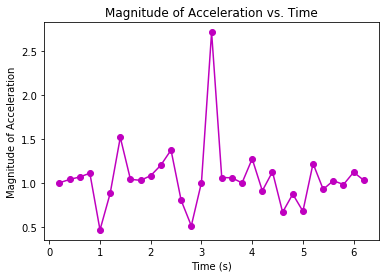

In [14]:
magnitudes = [sqrt( pow(mag_x_acc[i], 2) + pow(mag_y_acc[i], 2) + pow(mag_z_acc[i], 2) ) 
              for i in range(len(mag_x_acc))] 

plt.subplot(1, 1, 1)
plt.gca().set_title("Magnitude of Acceleration vs. Time")
plt.plot(mag_time, magnitudes, "mo-")
plt.ylabel("Magnitude of Acceleration")
plt.xlabel("Time (s)")
plt.show()

Let's see how this compares to our individual accelerations from our original data set and if it tells us anything useful or helps confirm our hyptheses:

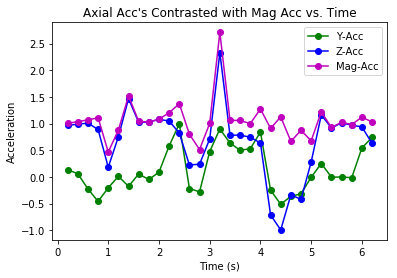

In [16]:
fig, ax = plt.subplots()
# ax.plot(time, x_acc, "ro-", label="X-Acc")
ax.plot(time, y_acc, "go-", label="Y-Acc")
ax.plot(time, z_acc, "bo-", label="Z-Acc")
ax.plot(mag_time, magnitudes, "mo-", label="Mag-Acc")
ax.set(xlabel="Time (s)", ylabel = "Acceleration", title = "Axial Acc's Contrasted with Mag Acc vs. Time")
ax.legend()

plt.show()

### **Pros**

This method is simple to implement and can be run quickly. Moreover, it is extremely sensitive to drastic events as shown in the graph titled Axial Acc's Contrasted with Mag Acc vs. Time. One can clearly see that some sort of movement event occured at the 3 second mark. Furthermore, this may help identify steps as it would appear some of the Mag Acc peaks coincide with what were hypothesized to be steps from initial inspection.

### **Cons**

However, this method is not very robust - it does not tell you anything about the direction of an event. It simply tells you the "severity" of an event and if it is abnormal. Moreover, downward accelerations can be positively affected and become difficult to distinguish from positive accelerations. 

### **Conclusion**

This method may be useful in the future as a sanity check as well as identifying significant events in the data. A first pass if you will. Moreover, I believe the values from the accelerometer can be centered around 0 in such a way as to better fit the data. This can help give a better indication of falls and what is happening in the data. 